In [1]:
# In this notebook, we explore the Adult dataset data.

In [2]:
# Import Data handling/display libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the Adult dataset
Adult_df = pd.read_csv('./input/adult.csv')

In [4]:
# How many (rows, columns)
Adult_df.shape

(48842, 15)

In [5]:
# Are there any missing or anomalous data
#Adult_df.info()
Adult_df.head(1)

,Age,Employment,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


AxesSubplot(0.125,0.125;0.775x0.755)


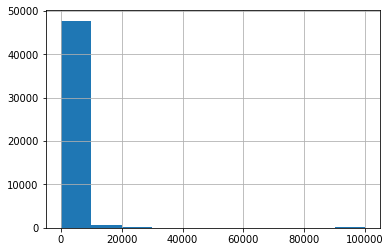

In [6]:
print(Adult_df.CapitalGain.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


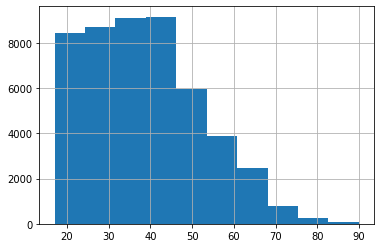

In [7]:
# Look at the age distribution
print(Adult_df.Age.hist())

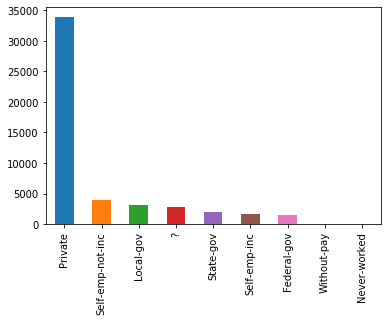

In [8]:
# Look at the Work Class distribution
Adult_df.Employment.value_counts().plot(kind = 'bar')

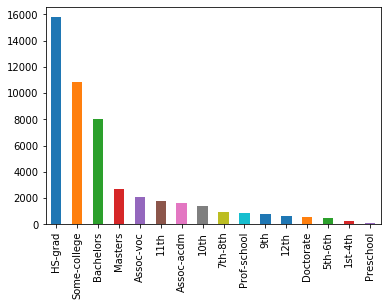

In [9]:
# Look at the Education Number distribution
Adult_df.Education.value_counts().plot(kind = 'bar')

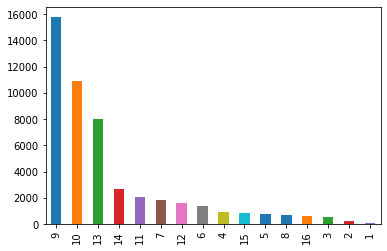

In [10]:
# Look at the Education Number distribution
Adult_df.EducationNum.value_counts().plot(kind = 'bar')

In [11]:
# See how many are in various educational categories
Adult_df[['Education', 'EducationNum']].groupby(['Education'], as_index=False).mean().sort_values(by='EducationNum', ascending=False)

,Education,EducationNum
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


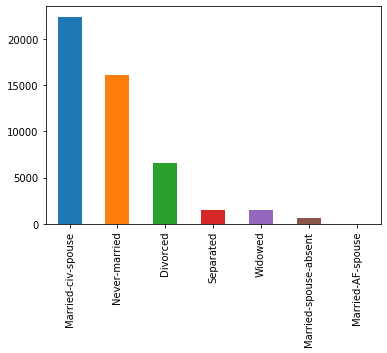

In [12]:
# Look at the Marital Status distribution
Adult_df.MaritalStatus.value_counts().plot(kind = 'bar')

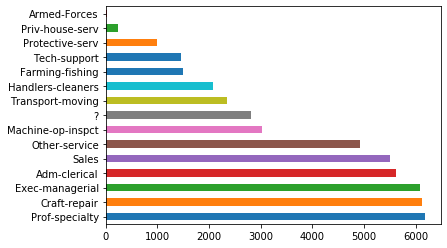

In [13]:
# Look at the Marital Status distribution
Adult_df.Occupation.value_counts().plot(kind = 'barh')

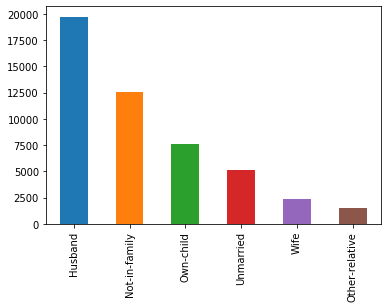

In [14]:
# Look at the Relationship distribution
Adult_df.Relationship.value_counts().plot(kind = 'bar')

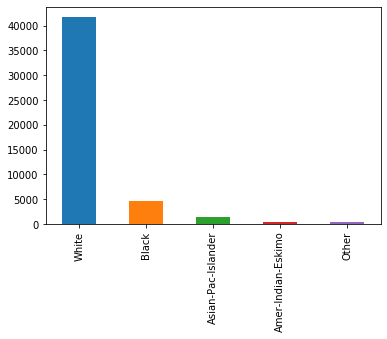

In [15]:
# Look at the Race distribution
Adult_df.Race.value_counts().plot(kind = 'bar')

In [16]:
# Look at the Gender distribution
Adult_df.Gender.value_counts()
#Adult_df.Gender.value_counts().plot(kind = 'bar')

Male      32650
Female    16192
Name: Gender, dtype: int64

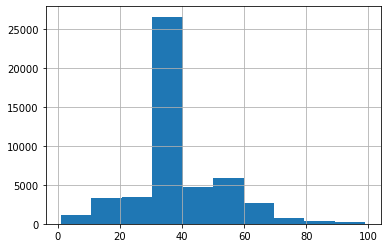

In [17]:
# Look at the Hours Per Week distribution
Adult_df.HoursPerWeek.hist()

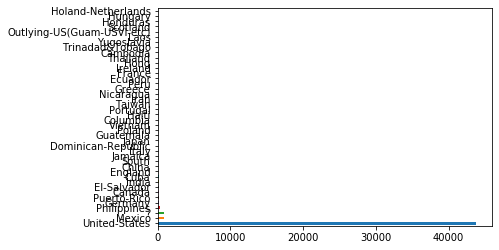

In [18]:
# What is the distribution between countries
Adult_df.NativeCountry.value_counts().plot(kind = 'barh')

In [19]:
# What is the Income distribution
#Adult_df.Income.value_counts().plot(kind = 'bar')
Adult_df.Income.value_counts()

<=50K    37155
>50K     11687
Name: Income, dtype: int64

In [20]:
### get into the meat of whats what
gender = Adult_df.groupby(['Gender', 'Income']).size().unstack(1)
# 1 is the default for unstack, but I put it to show explicitly what we are unstacking
gender

Income,<=50K,>50K
Gender,,
Female,14423,1769
Male,22732,9918


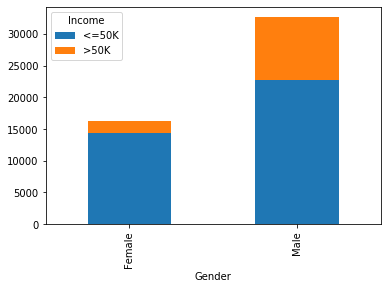

In [21]:
# Plot chart of number of women who've defaulted etc.
gender.plot(kind='bar', stacked = True)

In [22]:
# Use this to get the average of all columns for each value of DEFAULT
Adult_df.groupby(['Gender', 'Income']).mean()

Age         Fnlwgt  EducationNum  CapitalGain  \
Gender Income                                                        
Female <=50K   36.278999  185690.282604      9.824724   122.876586   
       >50K    42.219333  183989.519503     11.832109  4313.663652   
Male   <=50K   37.248548  192799.098671      9.454953   162.322673   
       >50K    44.641863  189269.827082     11.561908  3993.827586   

               CapitalLoss  HoursPerWeek  
Gender Income                             
Female <=50K     46.910976     35.875962  
       >50K     180.222725     40.678915  
Male   <=50K     58.746173     40.720702  
       >50K     195.902299     46.304396